In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# importing csv files.
crimes_19 = pd.read_csv('input_data/Chicago_Crimes_2019.csv')
crimes_20 = pd.read_csv('input_data/Chicago_Crimes_2020.csv')
crimes_21 = pd.read_csv('input_data/Chicago_Crimes_2021.csv')

# merging crimes data for the last 3 years into a signle dataframe
crimes_data = pd.merge((pd.merge(crimes_19,crimes_20, how="outer")),crimes_21,how="outer")

print(len(crimes_data))

679438


In [2]:
# converting Date column in dataframe to date format and adding columns for month, year, day, time
crimes_data["Date"] = pd.to_datetime(crimes_data['Date'])
crimes_data["Day"] = crimes_data['Date'].dt.day_name()
crimes_data["Month Day"] =crimes_data['Date'].dt.day
crimes_data["Month"] = crimes_data['Date'].dt.month_name()
crimes_data["Year"] = crimes_data['Date'].dt.year
crimes_data["Time"] =crimes_data['Date'].dt.time
crimes_data["AM_PM"] = pd.to_datetime(crimes_data['Date']).dt.strftime("%p")
crimes_data.dropna(how='any', inplace=True)
crimes_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Day,Month Day,Month,Year,Time,AM_PM
1,11554737,JC102447,2019-01-01 20:00:00,077XX S ABERDEEN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,True,...,3/30/2020 15:48,41.753720,-87.651399,"(41.753720143, -87.65139884)",Tuesday,1,January,2019,20:00:00,PM
2,11552577,JC100040,2019-01-01 00:31:00,032XX W LAWRENCE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,1/10/2019 15:16,41.968444,-87.709342,"(41.968444497, -87.709341738)",Tuesday,1,January,2019,00:31:00,AM
3,11552587,JC100034,2019-01-01 00:05:00,006XX E 83RD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1/10/2019 15:16,41.742968,-87.608410,"(41.742968219, -87.6084099)",Tuesday,1,January,2019,00:05:00,AM
4,11552596,JC100045,2019-01-01 00:03:00,001XX W HURON ST,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,HOTEL/MOTEL,False,False,...,1/10/2019 15:16,41.894822,-87.632134,"(41.894821547, -87.632133928)",Tuesday,1,January,2019,00:03:00,AM
5,11552605,JC100030,2019-01-01 00:01:00,004XX N MONTICELLO AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,...,1/10/2019 15:16,41.889196,-87.717404,"(41.889196391, -87.717403722)",Tuesday,1,January,2019,00:01:00,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679290,12545582,JE450838,2021-11-19 19:53:00,021XX W LEXINGTON ST,2820,OTHER OFFENSE,TELEPHONE THREAT,GOVERNMENT BUILDING / PROPERTY,True,False,...,4/7/2022 16:45,41.872333,-87.679608,"(41.872332627, -87.679608149)",Friday,19,November,2021,19:53:00,PM
679291,12560829,JE469376,2021-12-07 16:49:00,057XX S MAY ST,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,4/7/2022 16:45,41.790087,-87.653555,"(41.790086602, -87.653554734)",Tuesday,7,December,2021,16:49:00,PM
679317,12531163,JE433279,2021-11-04 00:59:00,034XX N OZANAM AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,...,4/7/2022 16:47,41.942213,-87.821580,"(41.942213367, -87.82158022)",Thursday,4,November,2021,00:59:00,AM
679404,12298015,JE148200,2021-02-21 19:16:00,037XX W ARMITAGE AVE,498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,True,True,...,4/13/2022 16:48,41.917234,-87.720926,"(41.917233894, -87.720925992)",Sunday,21,February,2021,19:16:00,PM


In [3]:
crime_type_overall = crimes_data.groupby(["Primary Type"])
overall_crime_type_df = pd.DataFrame(crimes_data["Primary Type"].value_counts())
overall_crime_type_df

,Primary Type
THEFT,141158
BATTERY,131204
CRIMINAL DAMAGE,76153
ASSAULT,59061
DECEPTIVE PRACTICE,48198
OTHER OFFENSE,42760
MOTOR VEHICLE THEFT,29354
NARCOTICS,26354
BURGLARY,24951
ROBBERY,23740


In [4]:
overall_crime_type_df = overall_crime_type_df.rename(
    columns={"Primary Type": "Crime Count"})
overall_crime_type_df

,Crime Count
THEFT,141158
BATTERY,131204
CRIMINAL DAMAGE,76153
ASSAULT,59061
DECEPTIVE PRACTICE,48198
OTHER OFFENSE,42760
MOTOR VEHICLE THEFT,29354
NARCOTICS,26354
BURGLARY,24951
ROBBERY,23740


In [5]:
top_ten_crimes = ["Theft","Battery","Criminal Damage","Assault","Deceptive Practice","Other Offense","Motor Vehicale Theft","Narcotics","Burglary","Robbery"]
crime_count = [141158,131204,76153,59061,48198,42760,29354,26354,24951,23740]
x_axis = np.arange(len(crime_count))

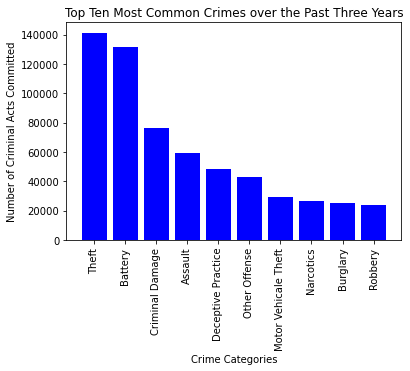

<Figure size 432x288 with 0 Axes>

In [6]:
plt.bar(x_axis, crime_count, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_ten_crimes, rotation="vertical")
plt.title("Top Ten Most Common Crimes over the Past Three Years")
plt.xlabel("Crime Categories")
plt.ylabel("Number of Criminal Acts Committed")



plt.show()
plt.tight_layout()

In [7]:
least_ten_crimes = ["Concealed Carry License Violation","Intimidation","Kidnapping","Gambling","Obscenity","Human Trafficking","Public Indecency","Other Narcotic Violation","Non-Criminal","Ritualism"]
least_crime_count = [534,441,377,180,156,30,24,14,8,1]
x_axis = np.arange(len(least_crime_count))


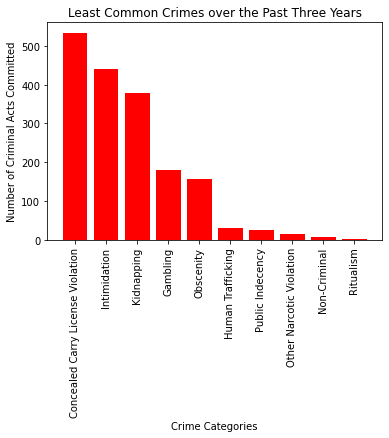

<Figure size 432x288 with 0 Axes>

In [8]:
plt.bar(x_axis, least_crime_count, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, least_ten_crimes, rotation="vertical")
plt.title("Least Common Crimes over the Past Three Years")
plt.xlabel("Crime Categories")
plt.ylabel("Number of Criminal Acts Committed")



plt.show()
plt.tight_layout()

In [9]:
number_crimes = crimes_data.groupby("Year")
yearly_crimes_df = pd.DataFrame(number_crimes["ID"].nunique())
yearly_crimes_df

,ID
Year,
2019,258143
2020,207427
2021,202350


In [10]:
yearly_crimes_df = yearly_crimes_df.rename(
    columns={"ID": "Crime Count"})
yearly_crimes_df

,Crime Count
Year,
2019,258143
2020,207427
2021,202350


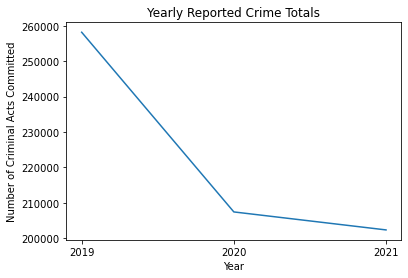

In [11]:
x = [2019,2020,2021]
y = [258143,207427,202350]
labels = ['2019', '2020', '2021']
 
# Plotting x-axis and y-axis
plt.plot(x, y)
 
# naming of x-axis and y-axis
plt.xlabel("Year")
plt.ylabel("Number of Criminal Acts Committed")
 
# naming the title of the plot
plt.title("Yearly Reported Crime Totals")
 
# setting x-axis values
plt.xticks(x, labels)
 
plt.show()


In [12]:
crime_type = crimes_data.groupby("Year")

crime_type_df = pd.DataFrame(crime_type["Primary Type"].value_counts())

crime_type_df



Primary Type
Year Primary Type                          
2019 THEFT                            61675
     BATTERY                          49472
     CRIMINAL DAMAGE                  26611
     ASSAULT                          20599
     DECEPTIVE PRACTICE               17256
...                                     ...
2021 GAMBLING                            13
     HUMAN TRAFFICKING                   12
     NON-CRIMINAL                         4
     PUBLIC INDECENCY                     4
     OTHER NARCOTIC VIOLATION             2

[96 rows x 1 columns]

In [13]:
crime_type_df = crime_type_df.rename(
    columns={"Primary Type": "Crime Count"})
crime_type_df


Crime Count
Year Primary Type                         
2019 THEFT                           61675
     BATTERY                         49472
     CRIMINAL DAMAGE                 26611
     ASSAULT                         20599
     DECEPTIVE PRACTICE              17256
...                                    ...
2021 GAMBLING                           13
     HUMAN TRAFFICKING                  12
     NON-CRIMINAL                        4
     PUBLIC INDECENCY                    4
     OTHER NARCOTIC VIOLATION            2

[96 rows x 1 columns]

In [15]:
crime_type_df["Crime Count"].sum()

667920

In [16]:
most_common_crimes = crime_type_df.sort_values(["Crime Count"],
                                           ascending=False)
most_common_crimes.head(30)

Crime Count
Year Primary Type                    
2019 THEFT                      61675
     BATTERY                    49472
2020 BATTERY                    41411
2021 BATTERY                    40321
2020 THEFT                      40224
2021 THEFT                      39259
2019 CRIMINAL DAMAGE            26611
2021 CRIMINAL DAMAGE            24847
2020 CRIMINAL DAMAGE            24695
2019 ASSAULT                    20599
2021 ASSAULT                    20256
2020 ASSAULT                    18206
2019 DECEPTIVE PRACTICE         17256
     OTHER OFFENSE              16725
2020 DECEPTIVE PRACTICE         15904
2021 DECEPTIVE PRACTICE         15038
2019 NARCOTICS                  14996
2021 OTHER OFFENSE              13639
2020 OTHER OFFENSE              12396
2021 MOTOR VEHICLE THEFT        10494
2020 MOTOR VEHICLE THEFT         9896
2019 BURGLARY                    9634
     MOTOR VEHICLE THEFT         8964
2021 WEAPONS VIOLATION           8945
2020 BURGLARY                    8704
     WEAPONS VIOLATION           8416
2019 ROBBERY                     7990
2021 ROBBERY                     7903
2020 ROBBERY                     7847
     NARCOTICS                   7269